# Appropriate Model for Best Clusturing - AgglomerativeClustering (Hierarchical Clusturing)

In [1]:
# importing the important Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Dataset Loading and Analysis 

In [2]:
df = pd.read_csv("smartcart_customers.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,80,30,61,2,6,5,10,3,0,0


In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Missing Value Handeling

52247.25135379061


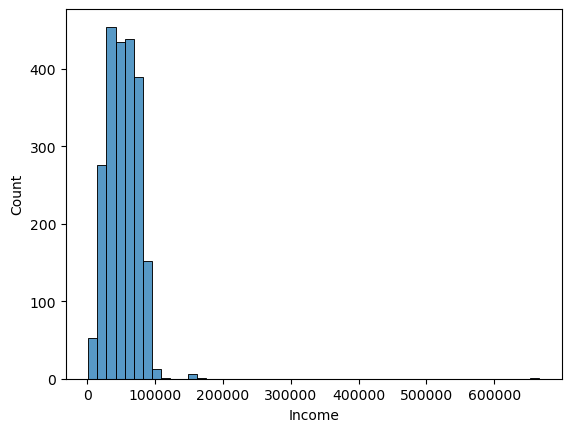

In [4]:
# Here Income Data is the some kind of the skewed so that's why we are goinng to fill with its median values 
# Chcking the skewness
sns.histplot(
    data = df,
    x = "Income",
    bins = 50
)

# Just try to see
# print(df.query("Income > 200000"))
print(df["Income"].mean())

In [5]:
df["Income"] = df["Income"].fillna(df["Income"].median())

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

# Feature Engineering

## 1) Year_Birth => Age Converting 

In [6]:
df["Age"] = 2026 - df["Year_Birth"]
df

# Alternate way
# df_copy = df.copy()

# max_birth_year = df_copy["Year_Birth"].max()
# df_copy["Age"] = max_birth_year - df_copy["Year_Birth"]
# df_copy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,42
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,118,247,2,9,3,4,5,0,0,59
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,8,7,8,2,5,7,0,0,80
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,12,24,1,2,3,13,6,0,0,45
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,30,61,2,6,5,10,3,0,0,70


## 2) Total_Spending = products(Sweet + Gold + Wines etc)

In [7]:
df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,1,69,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,0,72,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,0,61,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,0,42,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,0,45,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,247,2,9,3,4,5,0,0,59,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,8,7,8,2,5,7,0,0,80,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,24,1,2,3,13,6,0,0,45,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,61,2,6,5,10,3,0,0,70,843


## 3) Total_Children = KidHome + TeenHome

In [8]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,8,10,4,7,0,1,69,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,1,2,5,0,0,72,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,1,8,2,10,4,0,0,61,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,2,2,0,4,6,0,0,42,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,5,3,6,5,0,0,45,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,2,9,3,4,5,0,0,59,1341,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,8,2,5,7,0,0,80,444,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,2,3,13,6,0,0,45,1241,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,2,6,5,10,3,0,0,70,843,1


## 4) Customer_Tenure = maxDate - JoinDate (df["Dt_Customer"])

In [9]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)

reference_date = df["Dt_Customer"].max()

df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,Total_Children,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,1617,0,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,27,2,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,776,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,53,1,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,422,1,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,9,3,4,5,0,0,59,1341,1,381
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,8,2,5,7,0,0,80,444,3,19
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,2,3,13,6,0,0,45,1241,0,155
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,6,5,10,3,0,0,70,843,1,156


## 5) Categorical Column Handeling

In [10]:
df["Education"] = df["Education"].replace({
    "Graduation" : "Graduate", 
    "PhD" : "Postgraduate", "Master" : "Postgraduate",
    "2n Cycle" : "Undergraduate", "Basic" : "Undergraduate"
})

In [11]:
df["Live_With"] = df["Marital_Status"].replace({
    "Married" : "Partner", "Together" : "Partner",
    "Single" : "Alone", "Divorced" : "Alone",
    "Widow" : "Alone", "Alone" : "Alone",
    "Absurd" : "Alone", "YOLO" : "Alone"      
})

## Delete Unnecessary Columns 

In [12]:
df.columns

cols = ["ID", "Year_Birth", "Kidhome", "Teenhome", "Dt_Customer", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Marital_Status"]

df_cleaned = df.drop(columns = cols)
df_cleaned.shape

(2240, 15)

# Outliers Detection and Handeling

2240

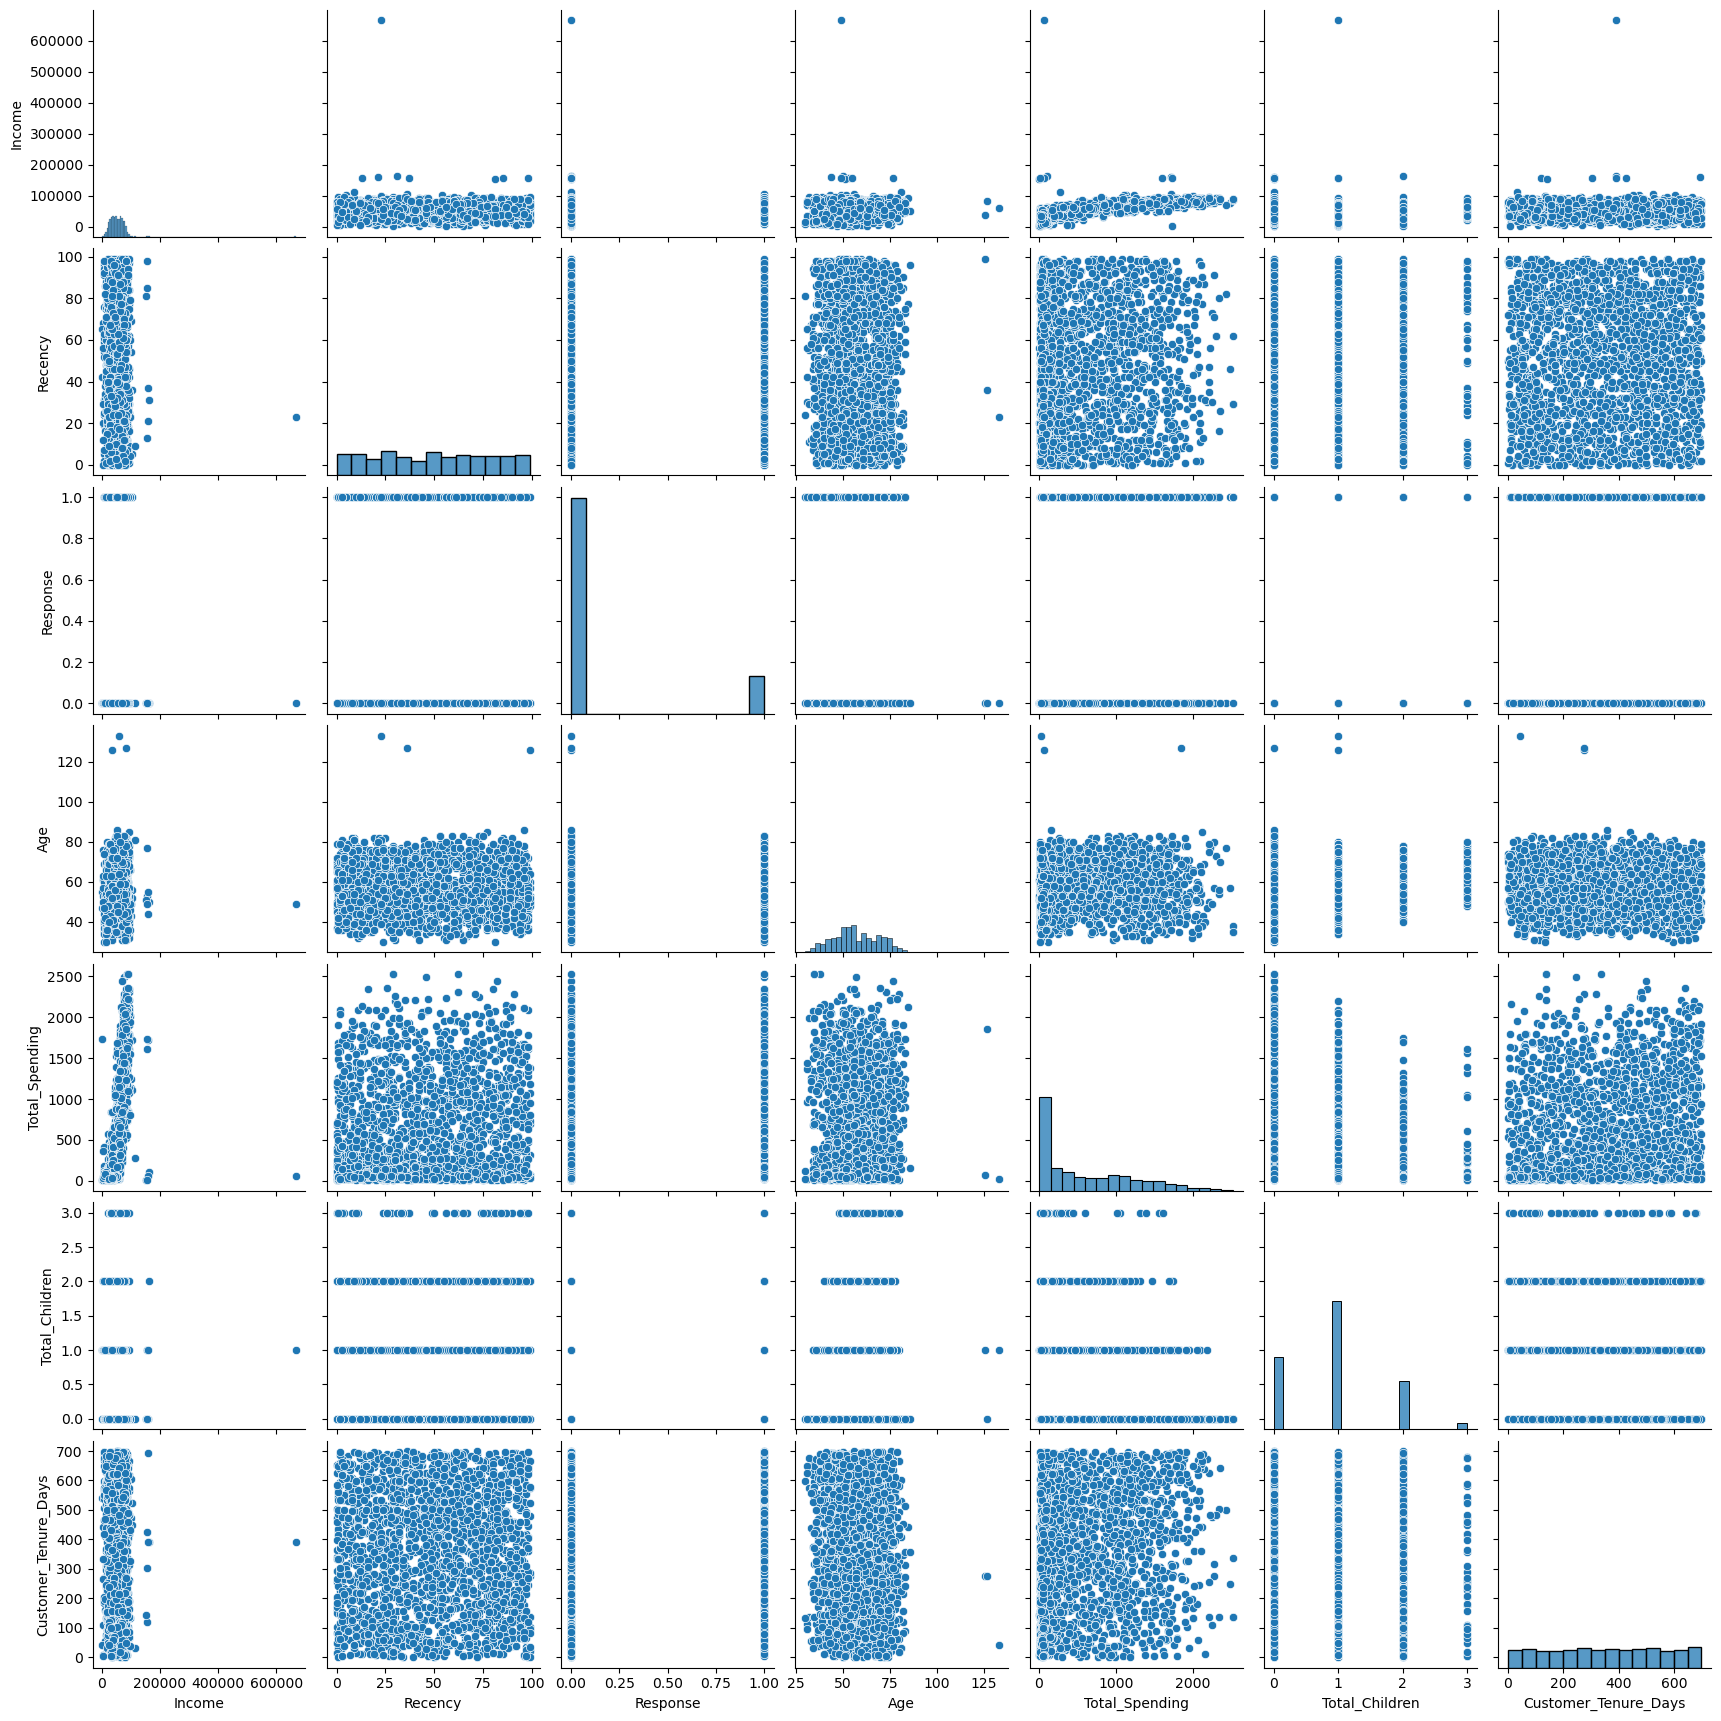

In [13]:
df_cleaned.columns

cols = ["Income", "Recency", "Response", "Age", "Total_Spending", "Total_Children", "Customer_Tenure_Days"]

# Plot the Total Pairs Plots
sns.pairplot(df_cleaned[cols])
len(df_cleaned)

In [14]:
# Outlier Removing 
print("Size with the outliers : ", len(df_cleaned))

# Age > 90
df_cleaned = df_cleaned[df_cleaned["Age"] <= 90]

# Income > 600_000
df_cleaned = df_cleaned[df_cleaned["Income"] < 600_000]

print("Size without outliers : ", len(df_cleaned))

Size with the outliers :  2240
Size without outliers :  2236


# Heatmap - Helpful in the Clusturing Behaviour Identification

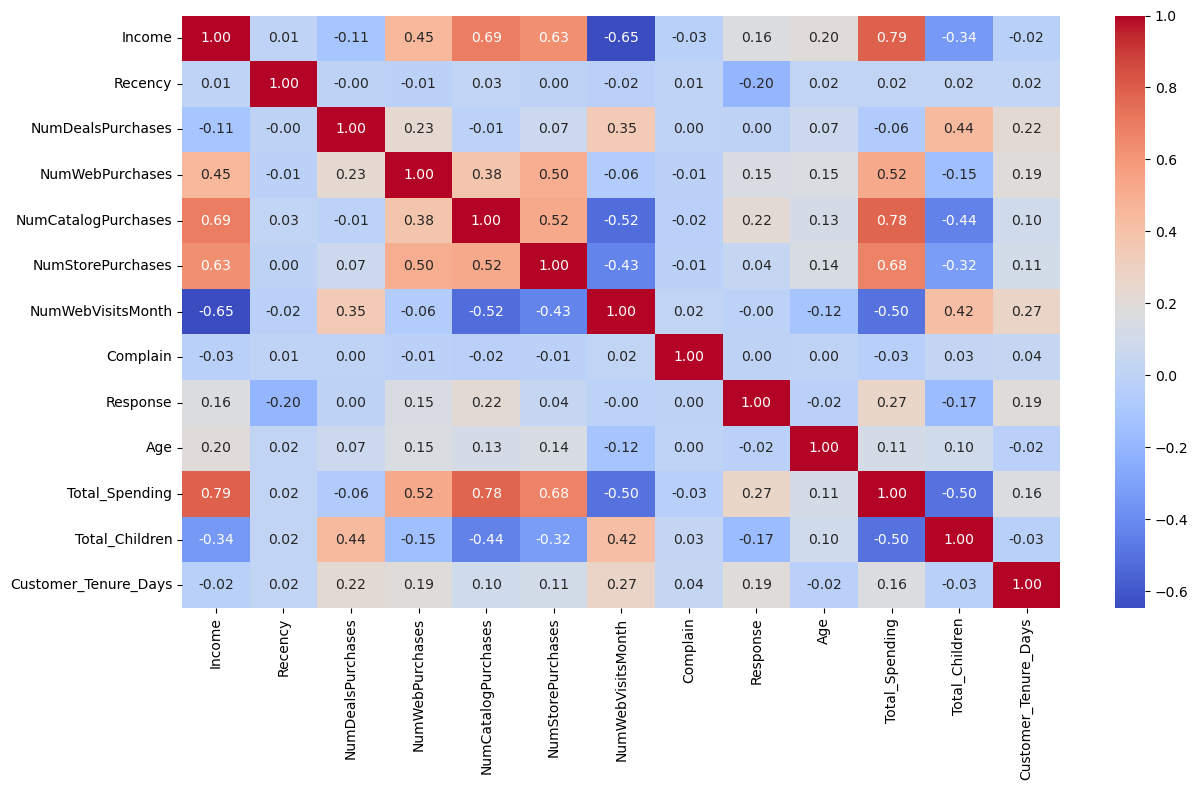

In [15]:
corr_matrix = df_cleaned.corr(numeric_only=True)

plt.figure(figsize = (13, 8))

sns.heatmap(
    corr_matrix, 
    fmt = ".2f",
    cmap = "coolwarm",
    annot = True
)

plt.tight_layout()

# Encoding 

In [16]:
cols = ["Education", "Live_With"]

ohe = OneHotEncoder()

encoded_cols = ohe.fit_transform(df_cleaned[cols])

encoded_cols.toarray()

array([[1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [17]:
# Now convert the row cols into the DataFrame 
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns = ohe.get_feature_names_out(cols), index = df_cleaned.index)

# Now add this encoded cols inside the original df
df_encoded = pd.concat([df_cleaned.drop(columns = cols), encoded_df], axis = 1)

In [18]:
print(df_encoded.shape)
df_encoded

(2236, 18)


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,Total_Children,Customer_Tenure_Days,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Live_With_Alone,Live_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,1617,0,663,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,27,2,113,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,776,0,312,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,53,1,139,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,422,1,161,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,2,9,3,4,5,0,0,59,1341,1,381,1.0,0.0,0.0,0.0,1.0
2236,64014.0,56,7,8,2,5,7,0,0,80,444,3,19,0.0,1.0,0.0,0.0,1.0
2237,56981.0,91,1,2,3,13,6,0,0,45,1241,0,155,1.0,0.0,0.0,1.0,0.0
2238,69245.0,8,2,6,5,10,3,0,0,70,843,1,156,0.0,1.0,0.0,0.0,1.0


In [19]:
print(df_cleaned.shape)
df_cleaned.groupby("Education")["Income"].mean()
df_cleaned.groupby("Live_With")["Income"].mean()

(2236, 15)


Live_With
Alone      52089.299748
Partner    51877.351595
Name: Income, dtype: float64

# Scaling

In [20]:
X = df_encoded.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled.shape

(2236, 18)

# Visualise the Data

## 2D Style 

In [22]:
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X_scaled)

In [23]:
# Take the varience ratio - not good 
pca.explained_variance_ratio_

array([0.23163158, 0.11385454])

Text(0, 0.5, 'PCA 2')

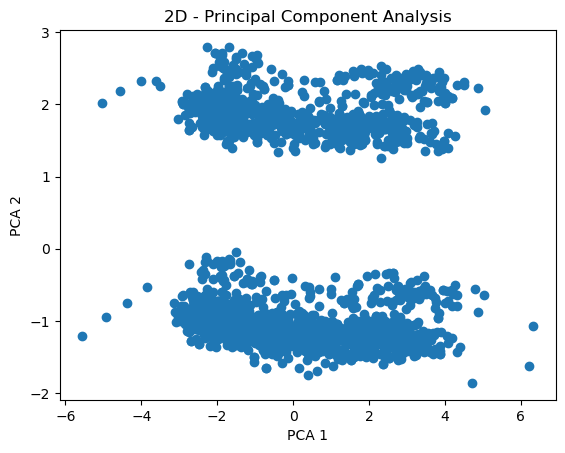

In [24]:
# Visualisation
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker = 'o')

plt.title("2D - Principal Component Analysis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

## 3D Style

In [25]:
# Firsy Apply the pca
pca_3d = PCA(n_components = 3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

pca_3d.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

C:\Users\jashs\anaconda3\Lib\site-packages\matplotlib\collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 0.92, '3D - Principal Componenet Analysis')

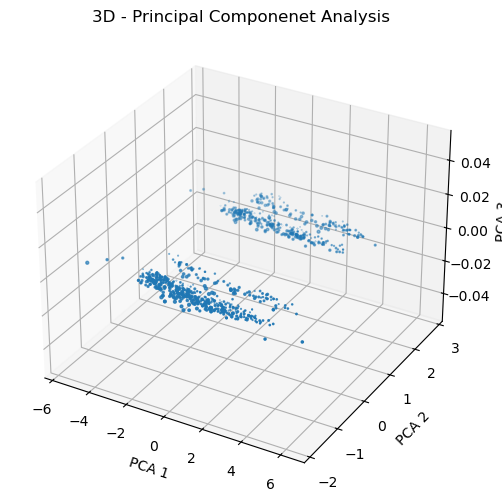

In [26]:
# 3D - Visaulisation 
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111, projection = "3d")

plt.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2])

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D - Principal Componenet Analysis")

# Analyse the K value 
## Elbow Method

In [1]:
# define the wcss list 
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_pca_3d)
    wcss.append(kmeans.inertia_)

In [28]:
knee = KneeLocator(range(1, 11), wcss, curve = "convex", direction = "decreasing") 
knee.elbow

np.int64(4)

<Axes: >

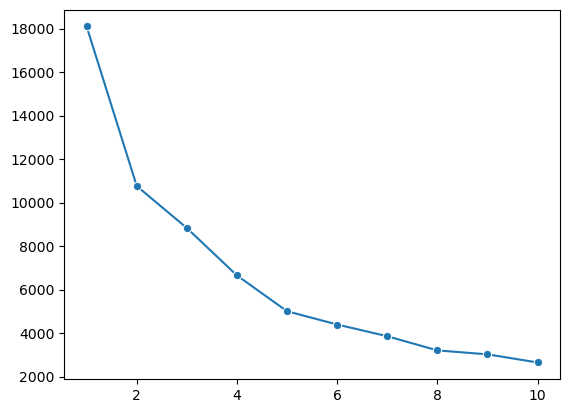

In [29]:
# Plot ans show the Knee Locator 
sns.lineplot(x = range(1, 11), y = wcss, marker = "o")

## Silhouette Score Method 

In [2]:
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_pca_3d)
    scores.append(silhouette_score(X_pca_3d, labels))

<Axes: >

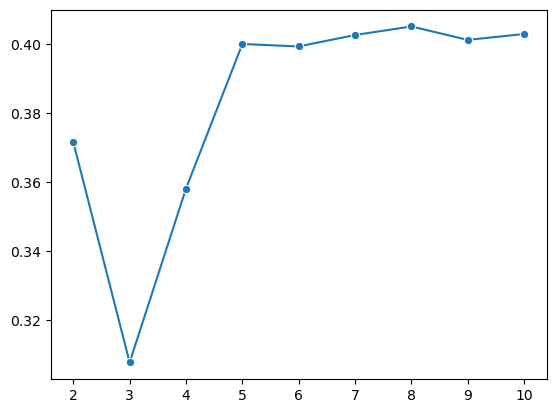

In [31]:
sns.lineplot(x = range(2, 11), y = scores, marker = 'o')

## Finalise graph 

Text(0, 0.5, 'SS')

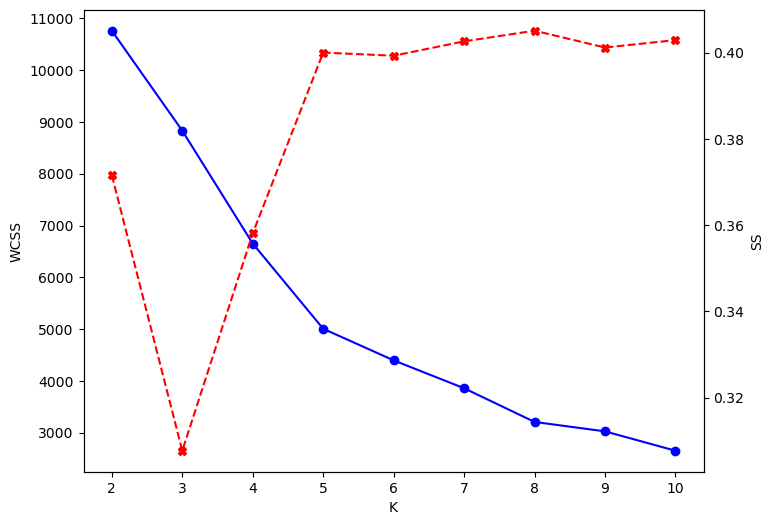

In [32]:
# Elbow and silhouette combined plot
k_range = range(2, 11)

fig, ax1 = plt.subplots(figsize = (8, 6))

ax1.plot(k_range, wcss[1:], marker = 'o', color = "blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores, marker = "X", color = "red", linestyle = '--')
ax2.set_ylabel("SS")

## Finalised the KMeans model 

In [33]:
kmeans_model = KMeans(n_clusters = 4, random_state = 42)
labels = kmeans_model.fit_predict(X_pca_3d)

C:\Users\jashs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0, 0.5, 'PCA 2')

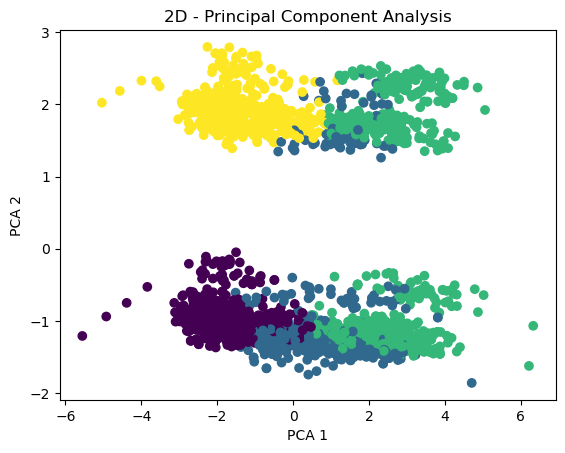

In [34]:
# Visualisation
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker = 'o', c = labels)

plt.title("2D - Principal Component Analysis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0.5, 0.92, '3D Projection')

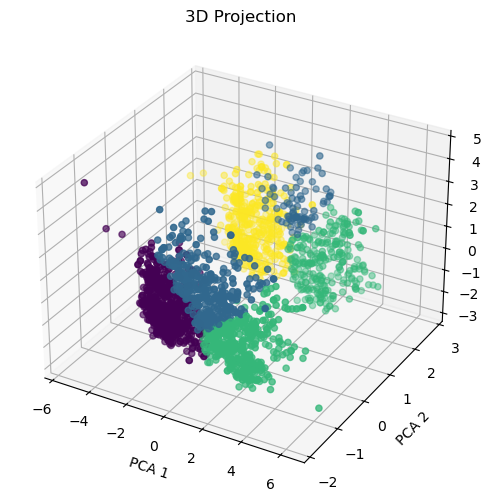

In [35]:
# 3d visulisation 
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c = labels)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Projection")

## DBSCAN method

In [36]:
dbscan = DBSCAN(
    eps = 1.6,
    min_samples = 36
)
labels_dbscan = dbscan.fit_predict(X_pca_3d)

In [37]:
set(labels_dbscan)

{np.int64(-1), np.int64(0), np.int64(1)}

Text(0, 0.5, 'PCA 2')

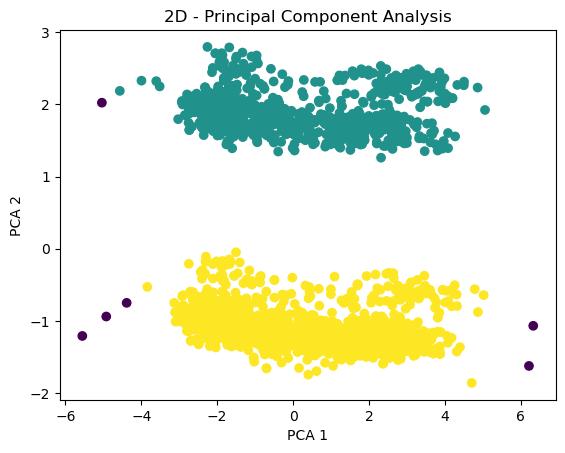

In [38]:
# Visualisation
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker = 'o', c = labels_dbscan)

plt.title("2D - Principal Component Analysis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0.5, 0.92, '3D Projection')

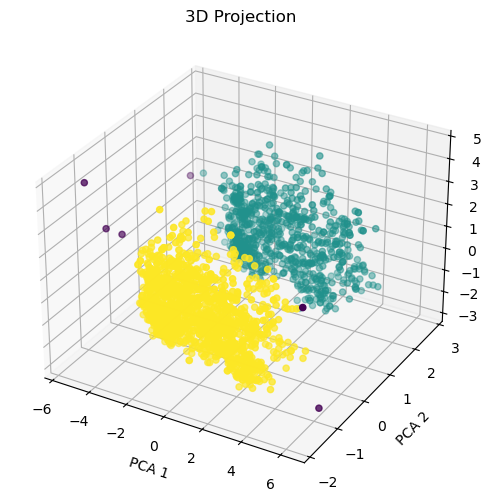

In [39]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c = labels_dbscan)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("3D Projection")

## Hierarchical Clustering - Agglomerative Clusturing

## Plot the Dendrogram

Text(0.5, 1.0, 'Dendrogram for the Deciding the K value')

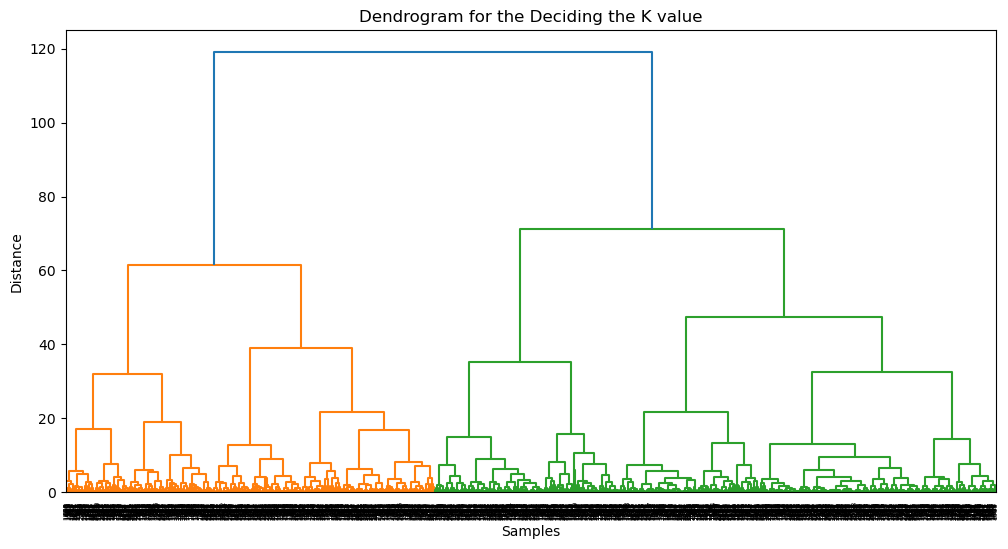

In [40]:
# First find the linkage 
Z = linkage(X_pca_3d, method = "ward")

# Plot 
plt.figure(figsize = (12, 6))
dendrogram(Z)
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.title("Dendrogram for the Deciding the K value")

In [41]:
# Create the Model 
model_hierarchy = AgglomerativeClustering(
    n_clusters = 4
)
labels_hierarchy = model_hierarchy.fit_predict(X_pca_3d)

Text(0, 0.5, 'PCA 2')

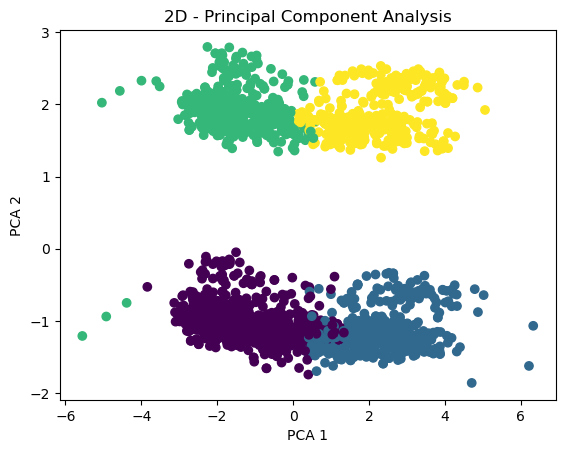

In [42]:
# Visualisation
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker = 'o', c = labels_hierarchy)

plt.title("2D - Principal Component Analysis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0.5, 0.92, 'Agglomerative Clusturing Analysis')

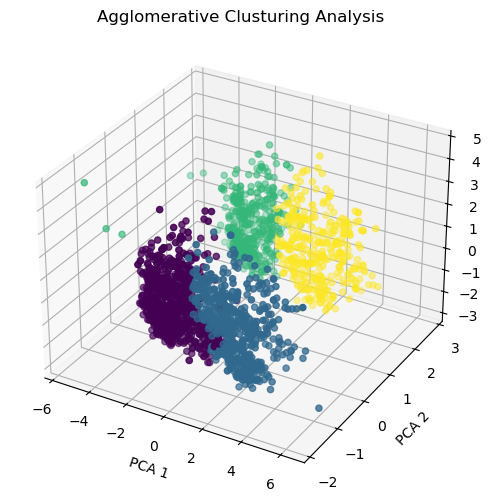

In [43]:
# 3D Plot 
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = "3d")

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c = labels_hierarchy)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("Agglomerative Clusturing Analysis")

# Characterization of Clusters 

In [46]:
X["cluster"] = labels_hierarchy

In [48]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,Total_Children,Customer_Tenure_Days,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Live_With_Alone,Live_With_Partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,1617,0,663,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,27,2,113,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,776,0,312,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,53,1,139,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,422,1,161,0.0,1.0,0.0,0.0,1.0,0


## Just try to show the Cluster Distribution 

<Axes: xlabel='cluster', ylabel='count'>

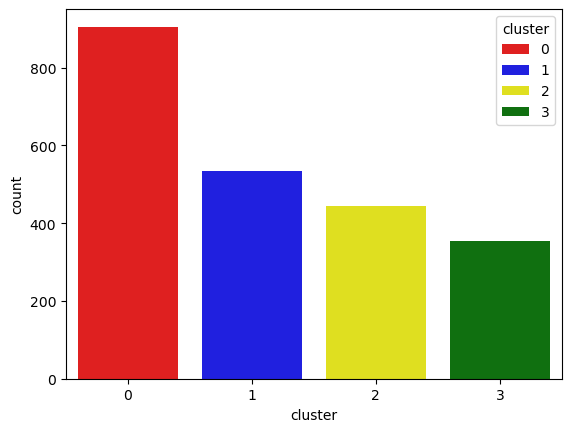

In [50]:
pal = ["red", "blue", "yellow", "green"]

sns.countplot(
    data = X,
    x = "cluster",
    palette = pal,
    hue = "cluster"
)

## Try to understand Clusters by Income vs Total_Spending 

<Axes: xlabel='Total_Spending', ylabel='Income'>

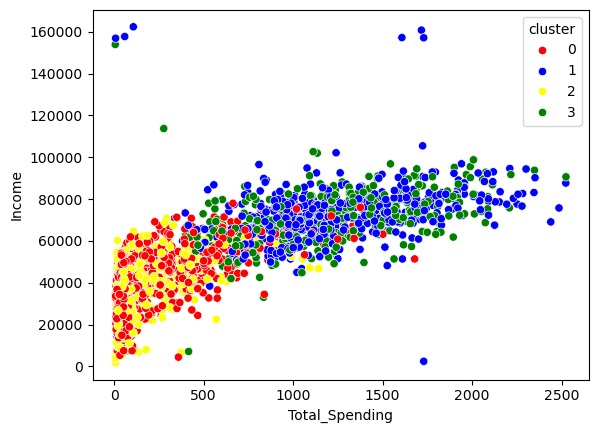

In [56]:
sns.scatterplot(
    data = X,
    x = "Total_Spending",
    y = "Income",
    hue = "cluster",
    palette = pal
)

## Proper Analysis of the clusters 

In [59]:
print(X.groupby("cluster").mean())

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Total_Spending  Total_Children  \
cluster               

## Report of Clusters

### Cluster 0 
- More Children
- Poor Response
- Live with Partner
- WebVisits are HIGH but WebPurchases are LOW
- Total_Spending is LESS
- Catalog Purchase and Store Purchase are LOW

### Cluster 1
- FEWER Children
- Avg Response 
- Slightly Higher Age
- Live with Partner
- WebVisits are LOW but WebPurchases are HIGH
- Total_Spending is HIGH
- Catalog Purchase and Store Purchase are HIGH

### Cluster 2
- More Children
- Avg Response
- Living Alone 
- WebVisits are HIGH but WebPurchases are LOW
- Total_Spending is VERY LESS
- Catalog Purchase and Store Purchase are VERY LOW


### Cluster 2
- VERY LESS Children
- Higher Response
- Totally Alone
- Slightly Higher Age
- WebVisits are LOW but WebPurchases are HIGH
- Total_Spending is HIGH
- Catalog Purchase and Store Purchase are HIGH

# Table of the Summary :- 

| Feature                              | Cluster 0                         | Cluster 1                          | Cluster 2                         | Cluster 3                          |
|--------------------------------------|-----------------------------------|------------------------------------|-----------------------------------|------------------------------------|
| Children                             | More                              | Fewer                              | More                              | Very Less                          |
| Response                             | Poor                              | Average                            | Average                           | Higher                             |
| Living Status                        | Partner                           | Partner                            | Alone                             | Totally Alone                      |
| Age                                  | Moderate                          | Slightly Higher                    | Moderate                          | Slightly Higher                    |
| Web Visits                           | High                              | Low                                | High                              | Low                                |
| Web Purchases                        | Low                               | High                               | Low                               | High                               |
| Total Spending                       | Less                              | High                               | Very Less                         | High                               |
| Catalog & Store Purchases            | Low                               | High                               | Very Low                          | High                               |
